# Logitic regression on ICAN clinical data

**Objective:** implement a logistic regression model with the ICAN clinical data.

## Library importation

In [1]:
library(finalfit)
library(knitr)
library(pls)
library(forestmodel)


Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings


Loading required package: ggplot2



## Data loading

In [2]:
ican <- read.csv("simulated_ican_clinical_data.csv", sep = "#", encoding = "utf8")
ican <- ican[,-c(dim(ican)[2]-1, dim(ican)[2])]
dim(ican)

[1] 2505   28

In [3]:
adjusted_IA_size_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$adjusted_IA_size[i] < 3) {
        adjusted_IA_size_class[i] <- "<3"
    } else if (ican$adjusted_IA_size[i] <= 5) {
        adjusted_IA_size_class[i] <- "3-5"
    } else if (ican$adjusted_IA_size[i] > 5) {
        adjusted_IA_size_class[i] <- ">5"
    } else {
        adjusted_IA_size_class[i] <- "Other"
    }
}
ican["adjusted_IA_size"] <- as.factor(adjusted_IA_size_class)

In [4]:
ican$IA_location <- factor(as.character(ican$IA_location), levels = c("ICA", "MCA", "ACA", "PCA"))
ican$packs_year <- factor(as.character(ican$packs_year), levels = c("Non-smoker", "Little_smoker", "Regular_smoker"))
ican$adjusted_IA_size <- factor(as.character(ican$adjusted_IA_size), levels = c("<3", "3-5", ">5"))

## Univariable Logistic Regression

In [5]:
dependent <- "rupture"
explanatory <- colnames(ican[,-dim(ican)[2]])
res_glm_uni <- ican %>%
    glmuni(dependent, explanatory) %>% 
    fit2df(estimate_suffix=" (univariate)")
kable(res_glm_uni,row.names=FALSE, align=c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory                            |OR (univariate)           |
|:--------------------------------------|:-------------------------|
|sexM                                   |0.93 (0.78-1.12, p=0.443) |
|age                                    |1.00 (1.00-1.01, p=0.492) |
|bmi                                    |1.00 (0.98-1.02, p=0.863) |
|sporadic_caseYes                       |1.03 (0.84-1.27, p=0.781) |
|multiple_IAYes                         |1.04 (0.87-1.23, p=0.681) |
|IA_locationMCA                         |0.98 (0.78-1.22, p=0.827) |
|IA_locationACA                         |1.04 (0.84-1.29, p=0.731) |
|IA_locationPCA                         |0.97 (0.76-1.25, p=0.829) |
|adjusted_IA_size3-5                    |1.03 (0.83-1.27, p=0.791) |
|adjusted_IA_size>5                     |0.90 (0.72-1.12, p=0.351) |
|packs_yearLittle_smoker                |1.08 (0.89-1.32, p=0.413) |
|packs_yearRegular_smoker               |1.30 (1.05-1.62, p=0.017) |
|alcohol> 150g                  

## Multivariables Logistic Regression

In [6]:
fit1 <- glm(rupture ~ ., data = ican, family = "binomial")
fit0 <- glm(rupture ~ sex + age + adjusted_IA_size + IA_location + hta + packs_year, 
            family = binomial, data = ican)
summary(fit0)


Call:
glm(formula = rupture ~ sex + age + adjusted_IA_size + IA_location + 
    hta + packs_year, family = binomial, data = ican)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1307  -1.0015  -0.9524   1.3499   1.5061  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)   
(Intercept)              -0.660457   0.219343  -3.011   0.0026 **
sexM                     -0.070119   0.092030  -0.762   0.4461   
age                       0.002442   0.003481   0.701   0.4831   
adjusted_IA_size3-5      -0.031762   0.131960  -0.241   0.8098   
adjusted_IA_size>5       -0.167309   0.139787  -1.197   0.2313   
IA_locationMCA           -0.016509   0.115888  -0.142   0.8867   
IA_locationACA            0.106379   0.131604   0.808   0.4189   
IA_locationPCA            0.061485   0.152809   0.402   0.6874   
htaYes                    0.014228   0.085069   0.167   0.8672   
packs_yearLittle_smoker   0.080131   0.099451   0.806   0.4204   
packs_yearRegu

In [7]:
tmp <- step(fit0, scope = formula(fit1), direction = "forward")

Start:  AIC=3371.24
rupture ~ sex + age + adjusted_IA_size + IA_location + hta + 
    packs_year

                                      Df Deviance    AIC
+ alcohol                              1   3346.9 3370.9
+ pad_history                          1   3347.1 3371.1
+ headaches                            1   3347.2 3371.2
<none>                                     3349.2 3371.2
+ ischemic_stroke_history              1   3347.4 3371.4
+ carotid_artery_stenosis_history      1   3347.6 3371.6
+ dyslipidemia                         1   3348.0 3372.0
+ vka_or_anticoagulant_ttt             1   3348.3 3372.3
+ ischemic_heart_disease_history       1   3348.3 3372.3
+ statin_ttt                           1   3348.4 3372.4
+ hormone_therapy_ttt                  1   3348.5 3372.5
+ platelet_aggregation_inhibiting_ttt  1   3348.7 3372.7
+ aortic_aneurysm_history              1   3348.9 3372.9
+ asthma                               1   3348.9 3372.9
+ multiple_IA                          1   3349

In [8]:
fit <- glm(tmp$call, data = ican, family = "binomial")
summary(fit) 


Call:
glm(formula = tmp$call, family = "binomial", data = ican)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2466  -1.0086  -0.9373   1.3356   1.6710  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.734936   0.222086  -3.309 0.000936 ***
sexM                       -0.068223   0.092190  -0.740 0.459284    
age                         0.002445   0.003489   0.701 0.483490    
adjusted_IA_size3-5        -0.025449   0.132181  -0.193 0.847324    
adjusted_IA_size>5         -0.149652   0.140205  -1.067 0.285799    
IA_locationMCA             -0.007495   0.116149  -0.065 0.948548    
IA_locationACA              0.105860   0.131824   0.803 0.421953    
IA_locationPCA              0.065514   0.153144   0.428 0.668801    
htaYes                      0.030372   0.085693   0.354 0.723022    
packs_yearLittle_smoker     0.082604   0.099664   0.829 0.407203    
packs_yearRegular_smoker    0.260647   0.110947

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
"Unable to resize forest panel to be smaller than its heading; consider a smaller text size"
Warning message:
"Ignoring unknown aesthetics: x"


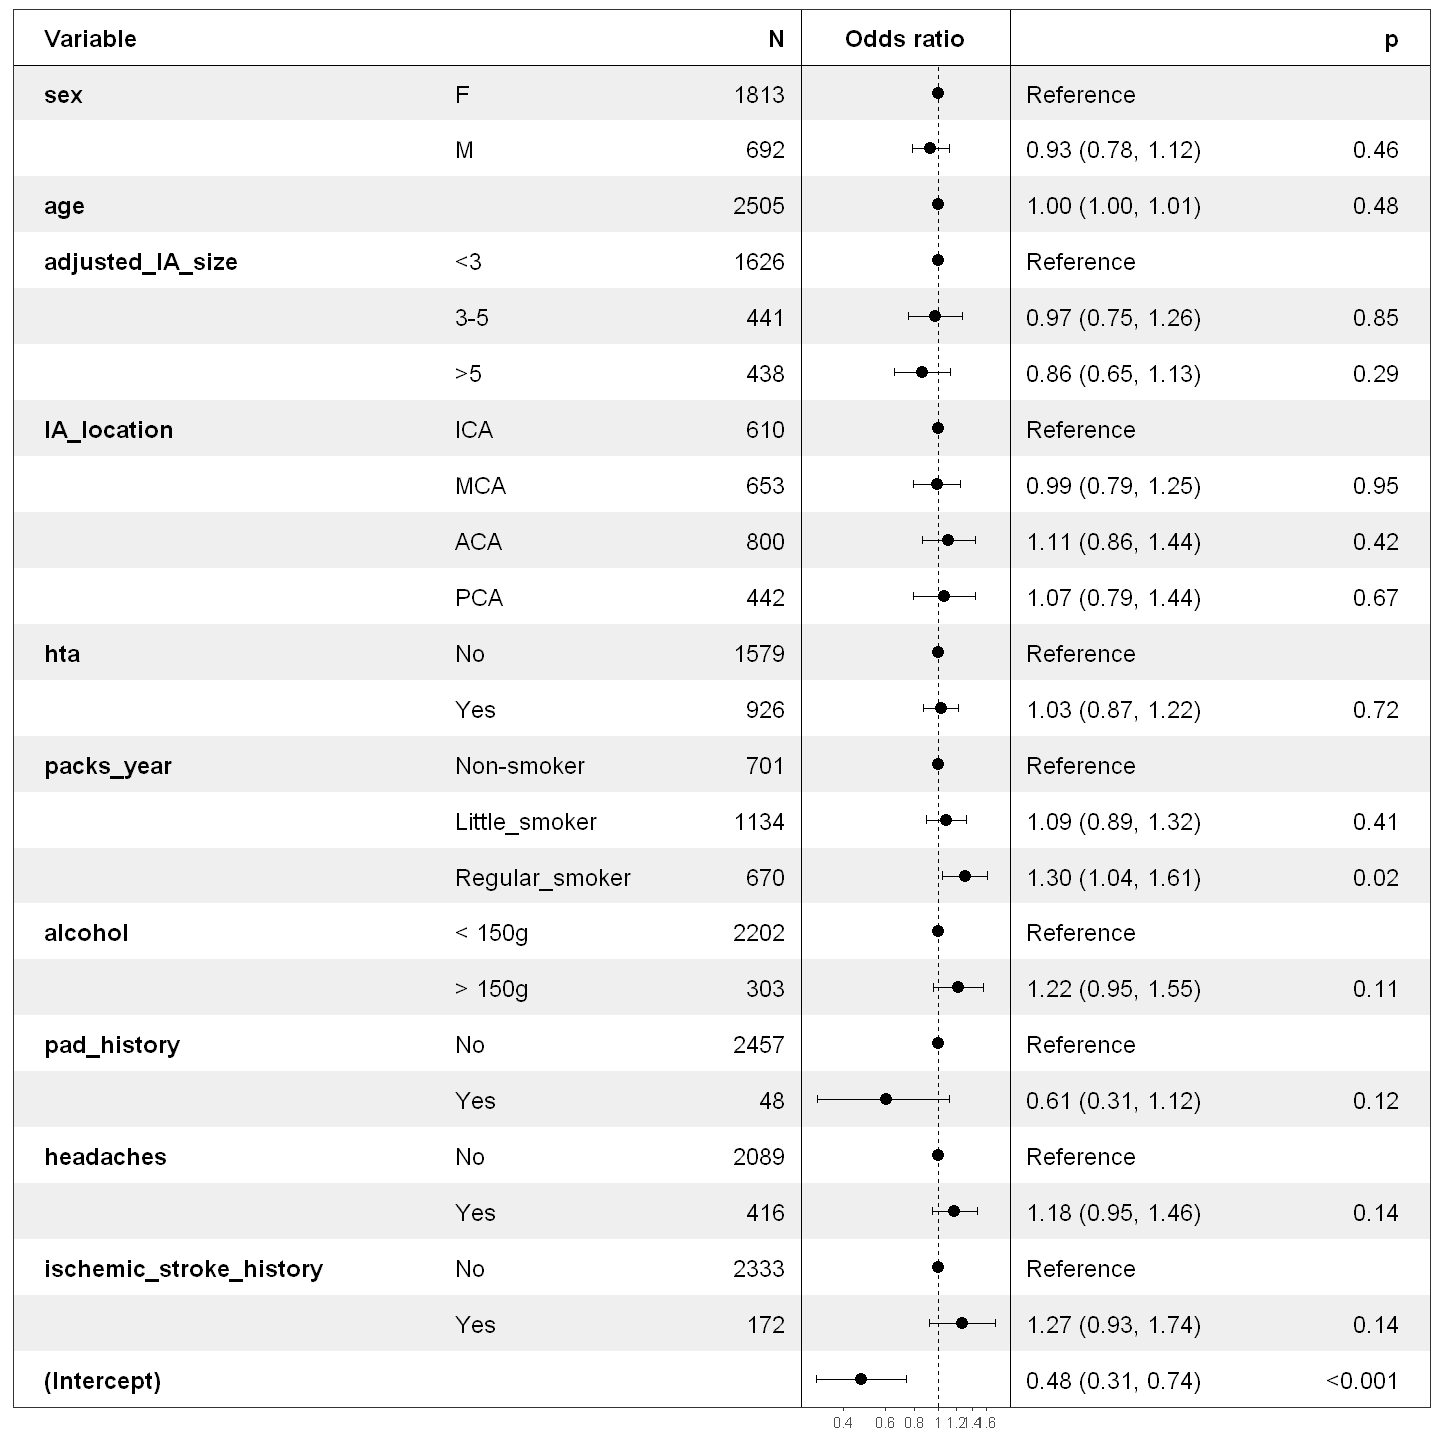

In [9]:
options(repr.plot.width = 12, repr.plot.height = 12)
forest_model(fit, format_options = list(colour = "black", shape = 20, text_size = 5, banded = TRUE))